# Definindo uma Arquiterua no Pytorch

**Carregando dados**

Exemplo de dados não linearmente separáveis (distribuição em lua):

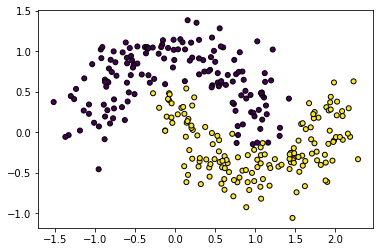

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker = 'o', c = Y1, s = 25, edgecolor = 'k')

## nn.Sequential

O módulo `nn.Sequential` é um container onde se pode colocar multíplos módulos. Ao reazlizar um `forward` em um objeto `Sequential` ele aplicará sequencialemnte os módulos nele contidas para gerar um saída.

Segue abaixo um exemplo desse módulo contendo 2 camadas `Linear` intercaladas por uma função de ativação `RelU`

In [2]:
import torch
from torch import nn # neural networks

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear (in_features = input_size, out_features = hidden_size ), # hidden
                    nn.ReLU(),    # ativação não linear
                    nn.Linear(in_features = hidden_size, out_features = output_size))  # output

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


O módulo `summary` da bibliotecha __torchsummary__ nos permite visualizar mais informações sobre a nossa redem, como a quantidade de parâmetros e o tamanho que cada elemento ocupa na memória.

In [3]:
from torchsummary import summary

summary(net, input_size = (1, input_size))

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0

## Forward

In [4]:
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])


## Classe nn.Module

A forma mais organizada de definir em PyTOrch é implementando uma classe nos moldes da classe `nn.Module`. Para redes pequenas, como as que estamos aprendendo até o momento, sua importância pode não se destacar, mas modelos maiores com funcionalidades mais complexas, são mais fáceis de implementar e realizar manutenções dessa forma.

Funções obrigaórias do `nn.Module`.

 - `__init()__`: definição de hiperparâmetros e instância do modelo
 - `forward()`: Fluxo da entrada para produzir uma saída 

In [5]:
class MinhaRede(nn.Module):
    
    # definir arquitetura
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRede, self).__init__()
        
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        
    # gerar uma saída a partir do X
    def forward(self, X):
        
        hidden = self.relu(self.hidden(X))
        output = self.output(hidden)
        
        return output

Instanciando uma rede:

In [6]:
input_size = 2
hidden_size = 8
output_size = 1

# O método __init__() é chamado implicitamente
net = MinhaRede(input_size, hidden_size, output_size) 
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


### Forward

In [7]:
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

torch.Size([300, 1])


### Subindo informações na GPU

Para conseguir executar modelos maiores em tampo hábil, é preciso carregar as informações na GPU para que o processamento seja realizado por ela. Dentre as informações que conhecemos até o momento, duas delas precisam ser carregadas na GPU:

- Entrada
- Rede

A cécula a seguir contém a implementação sugerida para realizar esse processo.

Se certifque que o notebook está na configuração desejada (CPU/GPU). Para isso, basta acessar `Edit -> Notebook Settings` e definir o hardware desejado.

In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
print(device)

cuda


In [10]:
input_size = 2
hidden_size = 8
output_size = 1

# O método __init__() é chamado implicitamente
net = MinhaRede(input_size, hidden_size, output_size) 
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [11]:
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred   = net(tensor)
print(pred.size())

torch.Size([300, 1])
